# Support Vector Machines on Cancer Dataset

**Import the required Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb 
import numpy as np

**Load the Breast Cancer Dataset from scikit-learn**

In [2]:
from sklearn.datasets import load_breast_cancer

cancerDataSet = load_breast_cancer()

#dir() function to understand the functionality
print(dir(cancerDataSet))    

['DESCR', 'data', 'feature_names', 'target', 'target_names']


**Load the data into pandas dataframe**

In [3]:
cancer = pd.DataFrame(cancerDataSet.data, columns=cancerDataSet.feature_names)
cancer.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


**The target values is missing from the data. Create a new column of target values and add it to dataframe**

In [4]:
cancer['target'] = cancerDataSet.target

In [5]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

**Data preprocessing**

In [6]:
# check for missing values in all the columns
cancer.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

**Correlation matrix**

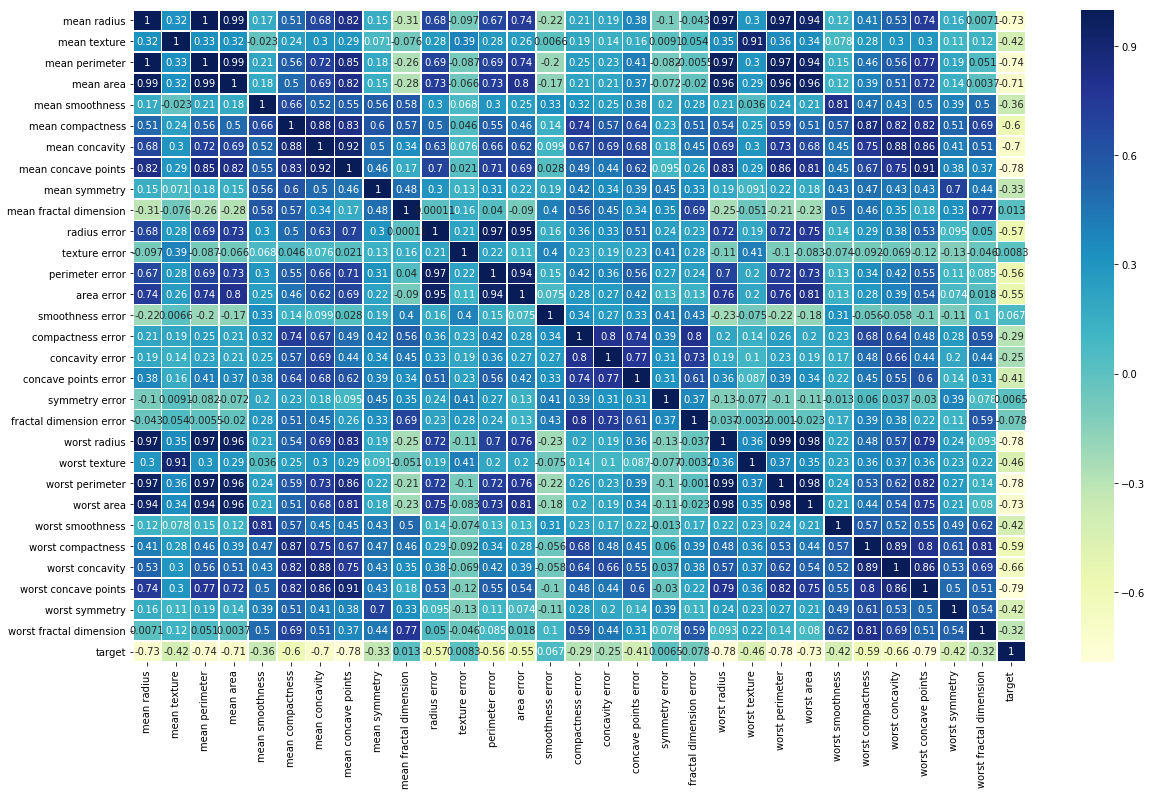

In [7]:
# check for highest feature correlation with the target variable
cancerCorrelationMatrix=cancer.corr()
plt.figure(figsize=(20,12)) 
sb.heatmap(cancerCorrelationMatrix, annot=True,linewidths=.5,cmap="YlGnBu")

**Identify the unique elements of the categorical data variable "target"**

In [8]:
print(cancer['target'].unique())

[0 1]


**Count the number of unique elements of the categorical data variable "target"**

In [9]:
cancer['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

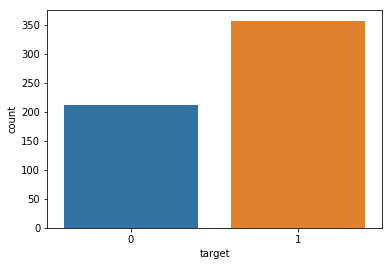

In [10]:
# plotting the 
sb.countplot(cancer['target'], label = "Count")

**Exploratory Data Analysis (EDA)**

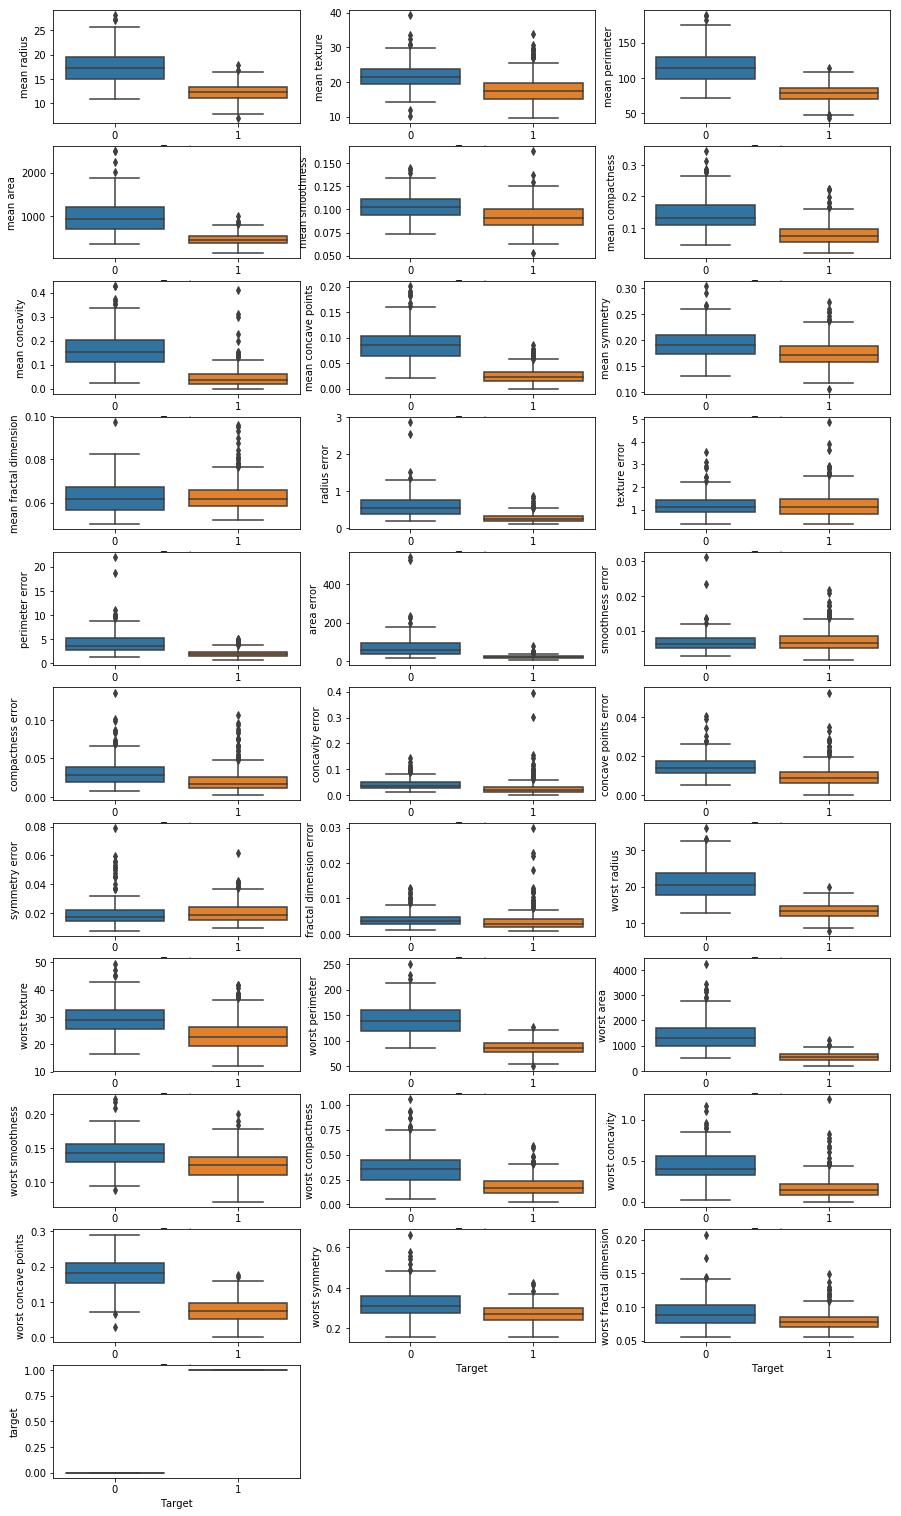

In [11]:
plt.figure(figsize=(15,27))
j= 1
for columns in cancer.columns:
    plt.subplot(11,3,j)
    sb.boxplot(cancer.target,cancer[columns])
    plt.xlabel("Target")
    plt.ylabel("%s"%columns)
    j = j +1
plt.show()

**Prepare the data for sampling**

In [12]:
X = cancerDataSet.data
Y = cancerDataSet.target

**Split the data into training and testing sets**

In [13]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state=40)

/home/varshita/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


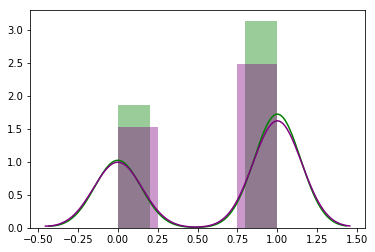

In [14]:
#check if the sampling done is good or bad

sb.distplot(Y,color = "green")
sb.distplot(ytrain,color = "purple")

**Observation : The sampling done is good.**

**Create a dictionary of parameters to be tuned **

In [15]:
tp = {"C":range(2,50)}

**Create the model using sklearn svm**

In [16]:
from sklearn import svm
svc = svm.SVC(random_state= 30)

**Find the best value of tuning parameter to reduce the model error using cross validation**

In [17]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(svc,tp,scoring="accuracy",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
svcBestParams=cvmodel.best_params_
print("The best parameters for Support Vector Machines is %s  "%svcBestParams)

The best parameters for Support Vector Machines is {'C': 2}  


In [18]:
svc = svm.SVC(kernel='linear',C =2,random_state = 30)
modelSupportVectorMachines=svc.fit(xtrain,ytrain)

**Build Predictions**

In [19]:
predSupportVectorMachines = modelSupportVectorMachines.predict(xtest)

**Confusion matrix and Accuracy score for Support Vector Machines**

The accuracy score for Support Vector Machines is 0.96


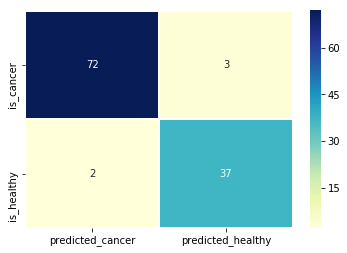

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("The accuracy score for Support Vector Machines is %.2f"%accuracy_score(ytest,predSupportVectorMachines))

cmSupportVectorMachines=np.array(confusion_matrix(ytest,predSupportVectorMachines,labels = [1,0]))

cmSupportVectorMachines = pd.DataFrame(cmSupportVectorMachines,index= ["is_cancer","is_healthy"],columns= ["predicted_cancer","predicted_healthy"])
sb.heatmap(cmSupportVectorMachines, annot=True,linewidths=1.5,cmap="YlGnBu")